# Tidyverse

[Hadley Wickham](http://hadley.nz/) created some amazing R packages for loading, editing, and visualizing data.
This collection of R packages in collectively called the [Tidyverse](https://www.tidyverse.org/).

* "Tidy" is refering to keeping data tidy
* This notebook is an adaptation from [this tutorial](http://tclavelle.github.io/dplyr-tidyr-tutorial/)

# Loading libraries

In [1]:
library(dplyr)
library(tidyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# Read data

In [2]:
cars = read.delim('../../src/mtcars.txt', sep='\t')
cars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


# pipeing

`%>%` is a "pipe" in R 

In [3]:
head(mtcars, n=3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1


In [4]:
mtcars %>% head(., n=3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1


In [5]:
mtcars %>% head(n=3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1


# Tidy data

Formatting data using specific "verbs" such as...

## dplyr

  * `filter()` subset data based on logical criteria
  * `select()` select certain columns
  * `mutate()` create a new variable/column
  * `group_by()` group data by common variables for performing calculations
  * `summarize()` summarize data into a single row of values
  * `arrange()` order rows by value of a column
  * `rename()` rename columns

## tidyr

  * `gather()` and `spread()` convert data between wide and long format
  * `separate()` and `unite()` separate a single column into multiple columns and vice versa
  * `complete()` turns implicit missing values in explicit missing values by completing missing data combinations

## filter() & select()

In [6]:
cars %>% 
    filter(mpg > 21, hp < 100) 

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2


## group_by() & summarize()

In [7]:
cars %>% 
    group_by(gear) %>%
    summarize(mean_mpg = mean(mpg)) 

gear,mean_mpg
3,16.10667
4,24.53333
5,21.38000


# ggplot2

## Simple plotting

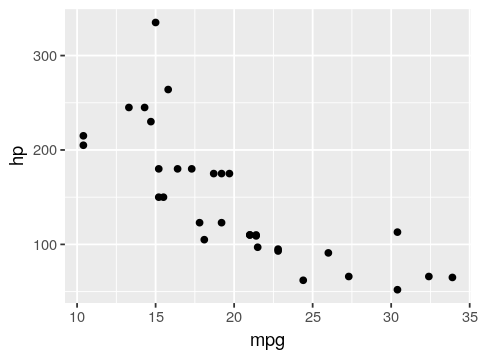

In [8]:
options(repr.plot.height=3, repr.plot.width=4)
ggplot(cars, aes(mpg, hp)) +
    geom_point() 

## Combining tidy data & ggplot

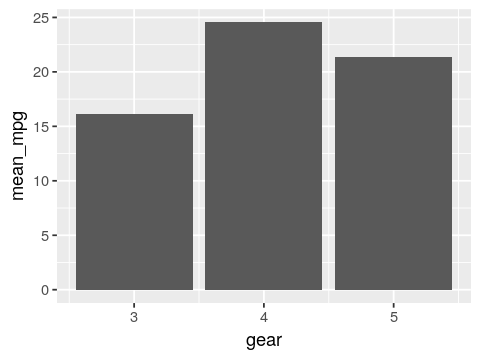

In [9]:
cars_summary = cars %>% 
    group_by(gear) %>%
    summarize(mean_mpg = mean(mpg)) 

options(repr.plot.height=3, repr.plot.width=4)
ggplot(cars_summary, aes(gear, mean_mpg)) +
    geom_bar(stat='identity')

# Resources

* [data wrangling cheat sheet](https://www.rstudio.com/wp-content/uploads/2015/02/data-wrangling-cheatsheet.pdf)
* [ggplot2 cheat sheet](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf)
* [Rstudio cheat sheets](https://www.rstudio.com/resources/cheatsheets/)

# Moving on...

[Notebook browser](.)